In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

C1 = 'Ч'
V = ord(C1) % 9
print('Вариант',  V)

df = pd.read_csv('audi.csv')
print('Количество строк:')
print(len(df['year']))
df.dropna()
print('Количество строк после удаления пропусков:')
print(len(df['year']))
print('\nПоищем выбросы по цене (будем считать выбросом значение, которое отклоняется от среднего на 2 СКО):')

mean = df['price'].mean()
std = df['price'].std()
threshold = 2 * std

df['Выброс'] = abs(df['price'] - mean) > threshold
df = df.drop(df[df['Выброс']].index)
df = df.drop('Выброс', axis=1)

print('Количество строк после удаления выбросов:')
print(len(df['year']))
df


Вариант 1
Количество строк:
10668
Количество строк после удаления пропусков:
10668

Поищем выбросы по цене (будем считать выбросом значение, которое отклоняется от среднего на 2 СКО):
Количество строк после удаления выбросов:
10187


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


## Задание 1

1. Распределение показателей
2. Распределение корреляции с целевым показателем
3. Пропуски
4. Аномалии

### Распределение показателей


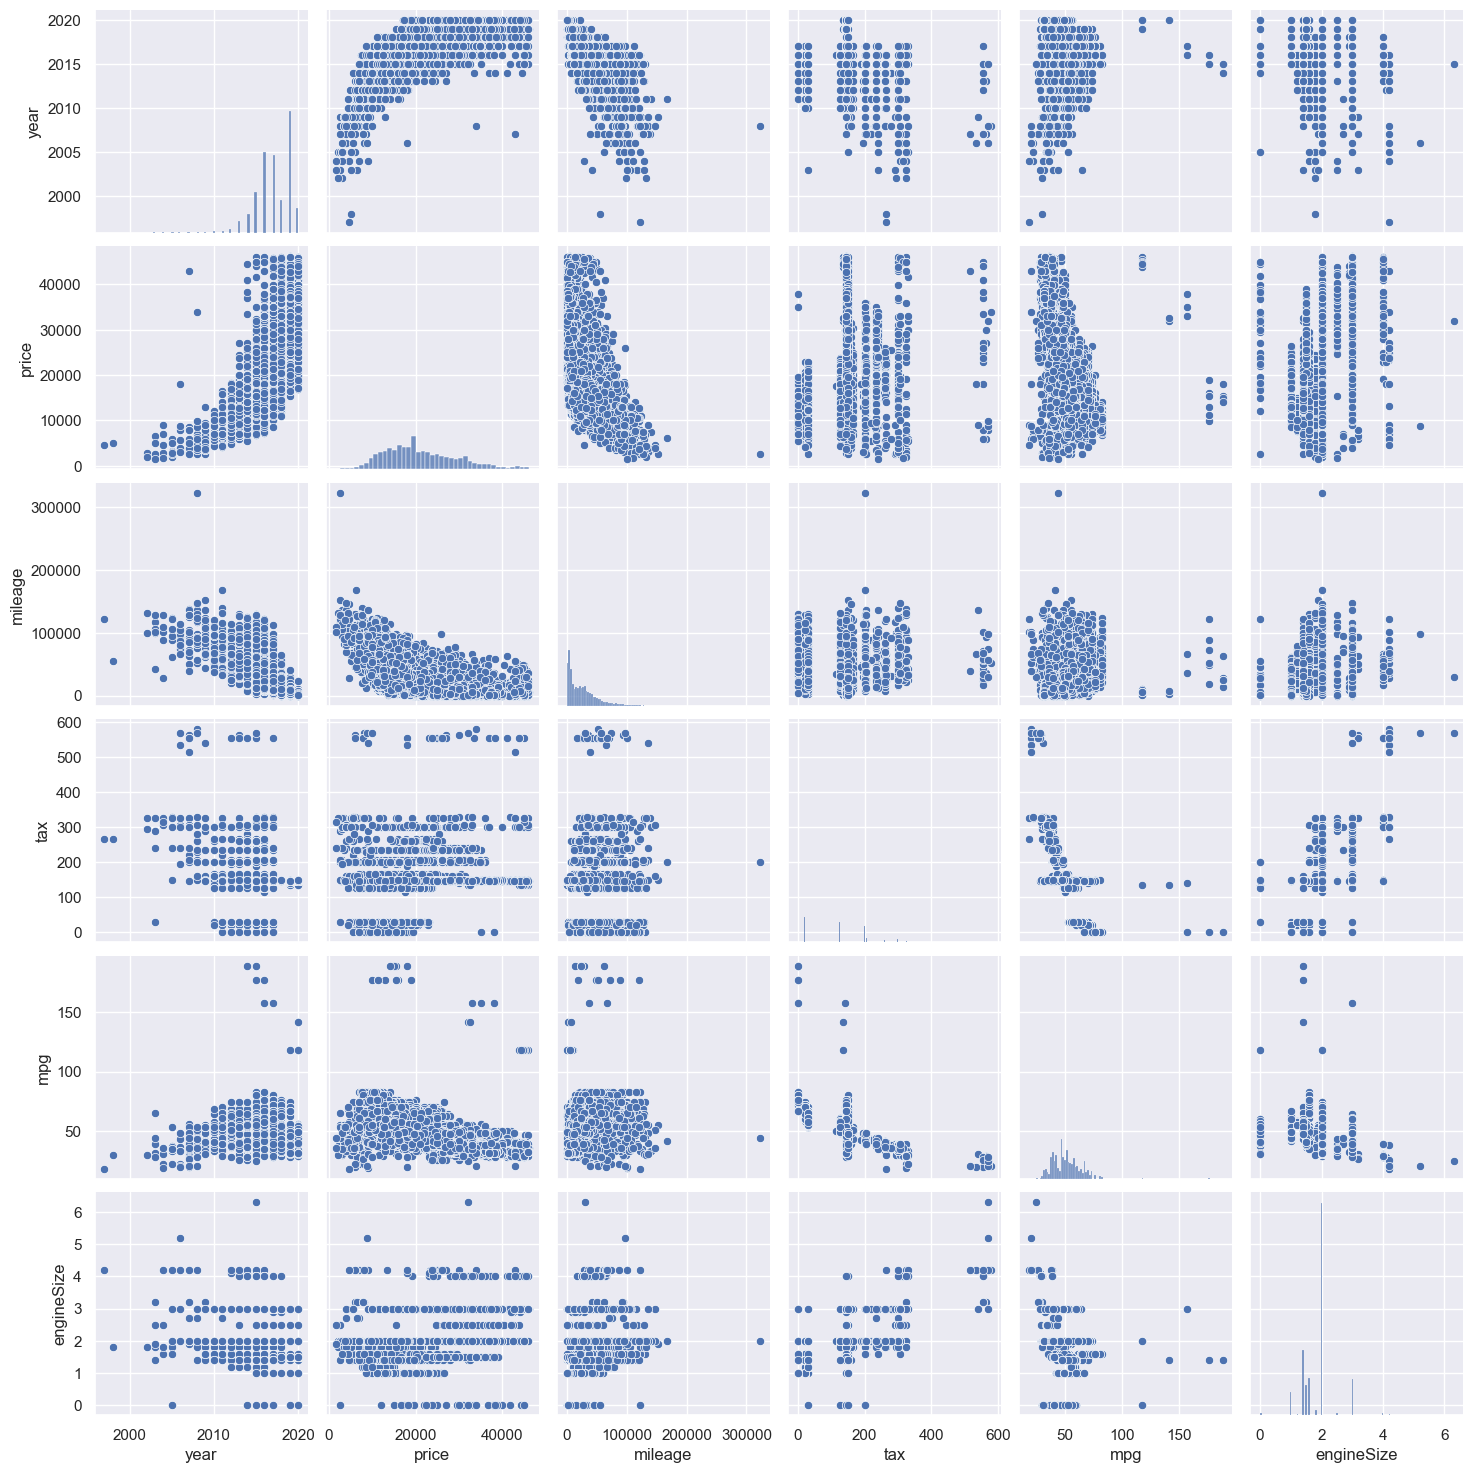

In [135]:
sns.pairplot(df)

/tmp/ipykernel_78480/2610297675.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='kendall'), annot=True)


<AxesSubplot: >

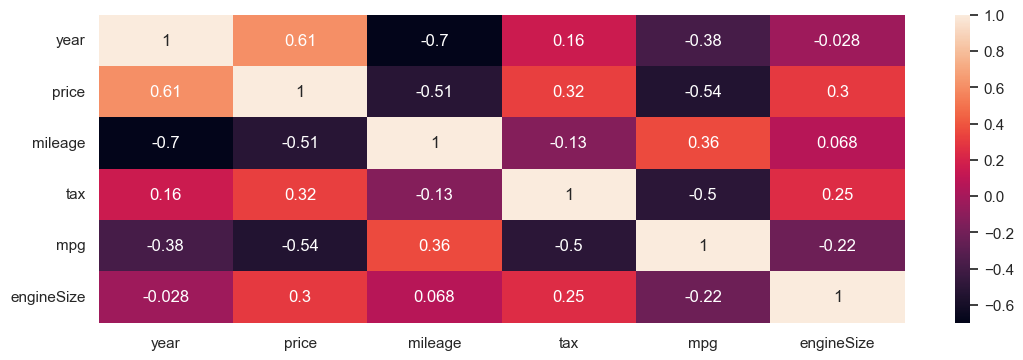

In [136]:
sns.heatmap(df.corr(method='kendall'), annot=True)

### Распределение корреляции с целевым показателем

Можно брать за целевой показатель:
- Цена (от года)
- Пробег (от года)


<AxesSubplot: xlabel='year', ylabel='price'>

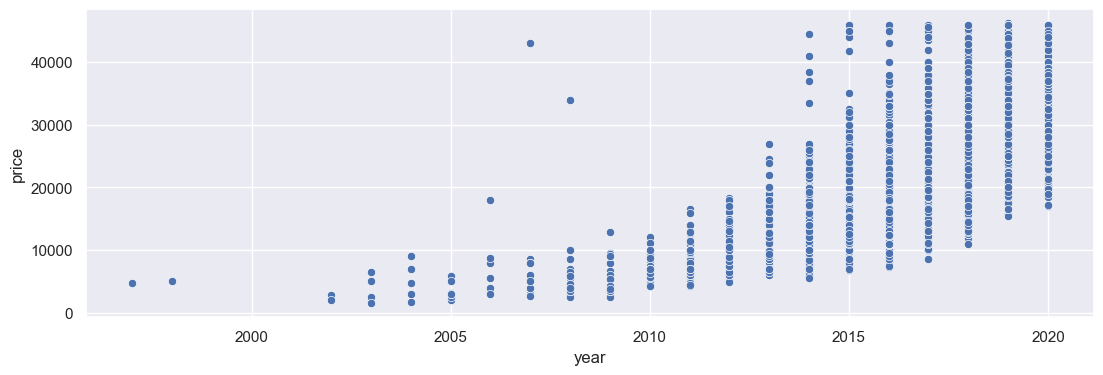

In [137]:
target = 'price'
sns.scatterplot(x = 'year', y = target, data=df )

<AxesSubplot: xlabel='year', ylabel='mileage'>

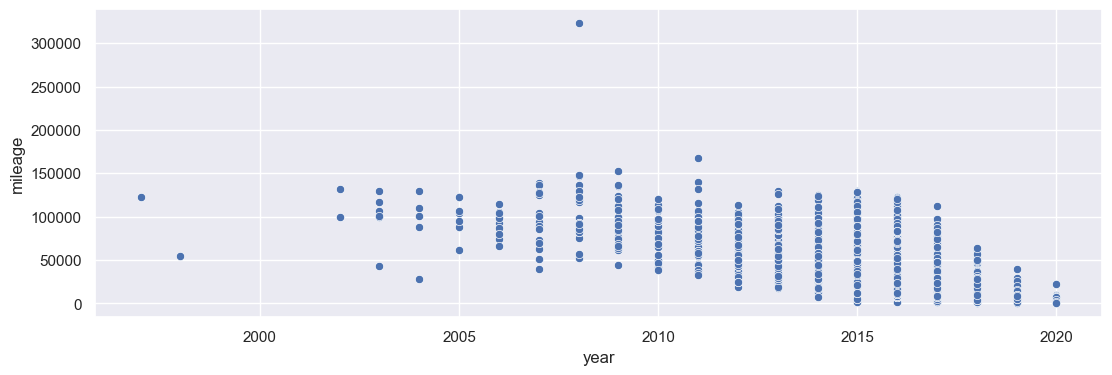

In [138]:
target = 'mileage'
sns.scatterplot(x = 'year', y = target, data=df )

#### Качественные показатели

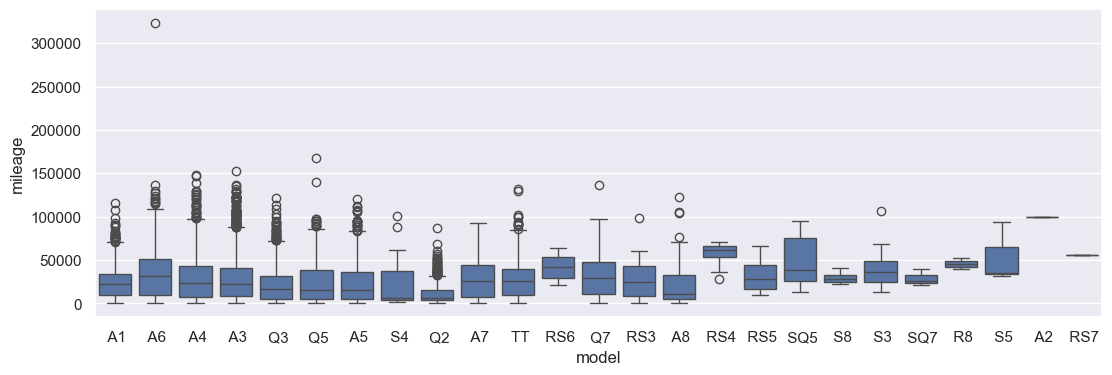

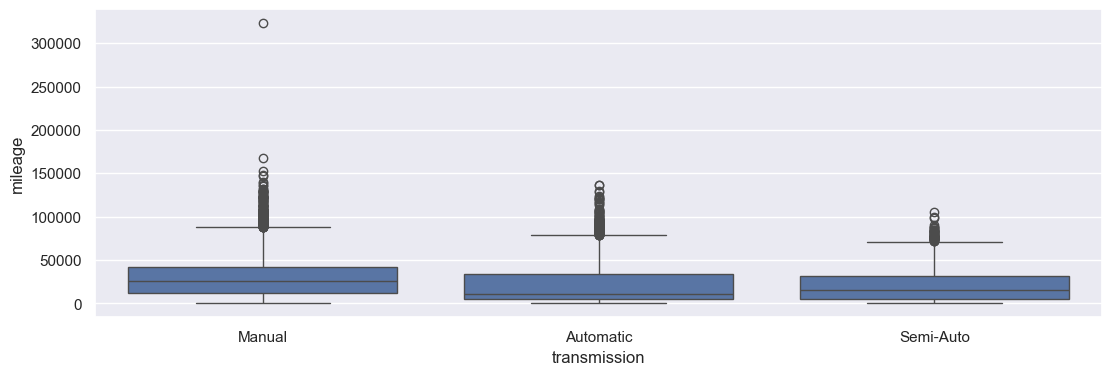

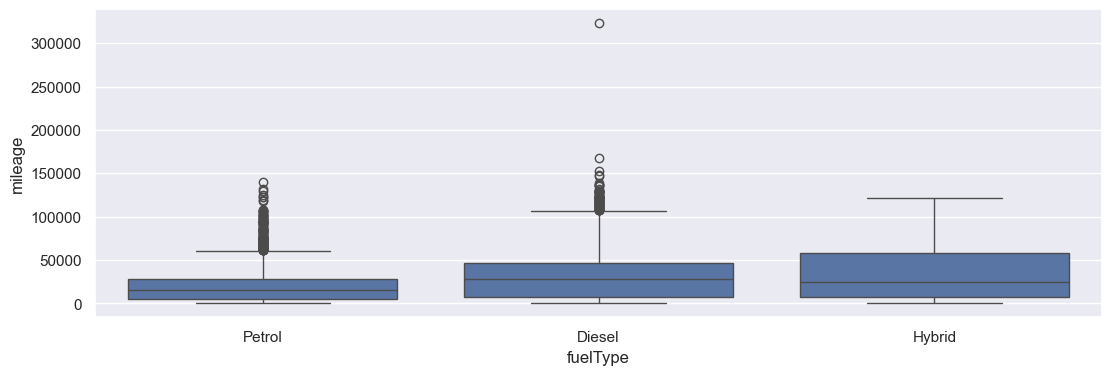

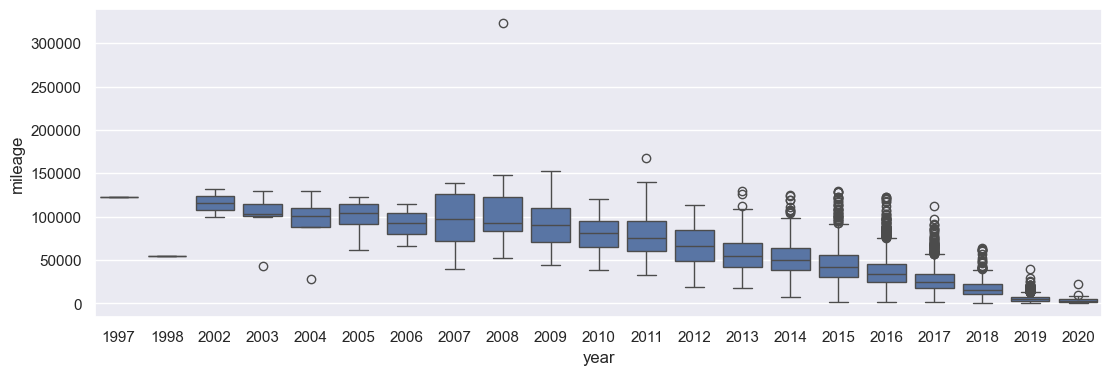

In [139]:
notNumArr = ['model', 'transmission', 'fuelType', 'year']
k= 0
for i in notNumArr:
    k+=1
    fig, axs = plt.subplots(ncols=1)
    sns.set (rc={"figure.figsize":(  13, 4 )})
    sns.boxplot(x= i, y = target, data=df)

## Задание 2

Постройте базовые регрессионные модели:
a. Constant (среднее значение целевого показателя)
b. ConstantByGroup (среднее значение на основе одного из показателей, например,
среднее значение цены по модели автомобиля)
c. OneParamModel (линейная регрессионная модель на базе одного выбранного
показателя)

Приведем качественные параметры в вид, чтобы не ломалась регрессия

In [140]:
df_for_regression = pd.get_dummies(df)
df_for_regression

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10664,2020,16999,1978,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10665,2020,17199,609,150,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10666,2017,19499,8646,150,47.9,1.4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [141]:
from sklearn.model_selection import train_test_split

target = 'mileage' # Оставим целевым пробег, так как там все же самая большая корр.
x = df_for_regression.drop(target, axis=1)
y = df_for_regression[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)
print('Размер обучающей выборки x:', len(x_train))
print('Размер тестовой выборки x:', len(x_test))
print('Размер обучающей выборки y:', len(y_train))
print('Размер тестовой выборки y:', len(y_test))



Размер обучающей выборки x: 7130
Размер тестовой выборки x: 3057
Размер обучающей выборки y: 7130
Размер тестовой выборки y: 3057


### Constant

Просто среднее значение пробега

In [142]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression

def constant_model(y_train_func, y_test_func):
    mean_val = y_train_func.mean()
    return pd.Series(np.full(len(y_test_func), mean_val))

const_predictions = constant_model(y_train, y_test)
print('MSE:', mean_squared_error(y_test, const_predictions, squared=False))

MSE: 24327.579385757523


 ### ConstantByGroup

Среднее значение пробега по модели автомобиля

In [143]:
x1 = df.drop(target, axis=1)
y1 = df[target]
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=20)

def constant_by_group():
    mean_values =[ df.loc[df['model'] == v, target].mean() for v in x_test1['model'] ]
    return pd.Series(mean_values)

const_by_group_predictions = constant_by_group()
print('MSE:', mean_squared_error(y_test1, const_by_group_predictions, squared=False))

MSE: 23335.96175180358


### OneParamModel

линейная регрессионная модель на базе одного выбранного показателя

Выбираем цену(price), как самый большой по корреляции

In [144]:
lr_one = LinearRegression()
x_train_one = x_train['price'].values.reshape(-1,1)
x_test_one = x_test['price'].values.reshape(-1,1)
lr_one.fit(x_train_one, y_train)
y_test_lr_one = lr_one.predict(x_test_one)
print('MSE:', mean_squared_error(y_test, y_test_lr_one, squared=False))

MSE: 18708.417291523783


## Задание 3

Постройте линейные регрессионные модели для прогноза целевого показателя
a. Без проведения нормализации \ с нормализацией
b. Только на количественных показателях \ на количественных и качественных
показателях

### Без нормализации

In [145]:
lr_all = LinearRegression()
lr_all.fit(x_train, y_train)
y_test_lr_all = lr_all.predict(x_test)
print('MSE:', mean_squared_error(y_test, y_test_lr_all, squared=False))
pd.Series(lr_all.coef_, index=x_train.columns)

MSE: 13526.40222679525


year                     -4.565510e+03
price                    -1.506752e+00
tax                      -3.319718e+01
mpg                      -9.398427e+01
engineSize                7.955353e+03
model_ A1                -1.439052e+04
model_ A2                -2.131622e+04
model_ A3                -7.713723e+03
model_ A4                -5.309959e+03
model_ A5                -4.852859e+03
model_ A6                -8.862282e+02
model_ A7                -3.919536e+03
model_ A8                -4.063531e+03
model_ Q2                -8.043739e+03
model_ Q3                -5.136065e+03
model_ Q5                 2.102063e+03
model_ Q7                 1.093093e+04
model_ R8                -1.013156e+04
model_ RS3                8.682205e+03
model_ RS4                5.628885e+03
model_ RS5                1.033682e+04
model_ RS6                2.185583e+04
model_ RS7               -1.000444e-11
model_ S3                 3.214740e+02
model_ S4                 4.654376e+03
model_ S5                

### С нормализацией

In [146]:
# Нормализацией имеет смысл заниматься только с количественными столбцами
from sklearn.preprocessing import StandardScaler

numArr = ['tax','mpg','engineSize', 'price']

stdScaler = StandardScaler()
df_num = df[numArr]
# x_train_scaled = stdScaler.fit_transform(df_num[numArr])
# x_test_scaled = stdScaler.transform(x_test[numArr])
df_num[numArr] = stdScaler.fit_transform(df_num[numArr])

df_num

/tmp/ipykernel_78480/389757076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[numArr] = stdScaler.fit_transform(df_num[numArr])


,tax,mpg,engineSize,price
0,0.382198,0.307195,-0.901109,-1.036843
1,-1.560493,1.009487,0.256032,-0.562110
2,-1.411056,0.307195,-0.901109,-1.214868
3,0.307479,1.256885,0.256032,-0.526505
4,0.307479,-0.155679,-1.672537,-0.467163
...,...,...,...,...
10663,0.307479,-0.155679,-1.672537,-0.502887
10664,0.382198,-0.155679,-1.672537,-0.502887
10665,0.382198,-0.155679,-1.672537,-0.479150
10666,0.382198,-0.291349,-0.901109,-0.206179


In [147]:
df1 = pd.concat([df_num,df[target]],axis=1)
X = df1.drop(target, axis = 1)
y = df1[target]
X_train1,  X_test1, Y_train1, Y_test1 = train_test_split(X, y, test_size = 0.30, random_state = 40)

lr_all = LinearRegression()
lr_all.fit(X_train1, Y_train1)
y_test_lr_all = lr_all.predict(X_test1)
print('MSE:', mean_squared_error(Y_test1, y_test_lr_all, squared=False))
print('По нормализованным значениям можно определить настоящую важность показателей')
pd.Series(lr_all.coef_, index=X_train1.columns)

MSE: 14879.497961649342
По нормализованным значениям можно определить настоящую важность показателей


tax            -347.910640
mpg             366.418246
engineSize    11697.497077
price        -19161.775632
dtype: float64

### Только на количественных показателях

В данном случае в качестве качественных можно учитывать год и объем двигателя

In [148]:
x_train_only_num = x_train1.drop(notNumArr, axis=1)
x_test_only_num = x_test1.drop(notNumArr, axis=1)
lr_all = LinearRegression()
lr_all.fit(x_train_only_num, y_train1)
y_test_lr_all = lr_all.predict(x_test_only_num)
print('MSE:', mean_squared_error(y_test1, y_test_lr_all, squared=False))

MSE: 15479.906541642042


## Задание 4

Применение других регрессионных моделей
a. Полиномиальная регрессионная модель (с регуляризацией и без регуляризации)
b. Модель на основе дерева решений
c. Модель на основе случайного леса


### Полиномиальная регрессионная модель

#### С регуляризацией

In [149]:
from sklearn.linear_model import Lasso
#Полиномиальная регрессия

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=10, include_bias=False)
poly_df = poly_reg.fit_transform(X_train1)
scaled_poly = stdScaler.fit_transform(poly_df)
print(f"shape: {scaled_poly.shape} ")

lassoModel = Lasso()

lassoModel.fit(scaled_poly, Y_train1)
y_test_lr_poly = lassoModel.predict(scaled_poly)
print('MSE:', mean_squared_error(Y_train1, y_test_lr_poly, squared=False))




shape: (7130, 1000) 
MSE: 11795.086762579116


/home/andrew/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.426e+11, tolerance: 4.025e+08
  model = cd_fast.enet_coordinate_descent(


#### Без регуляризации

In [150]:
#Полиномиальная регрессия без регуляризации

poly_reg = PolynomialFeatures(degree=10, include_bias=False)
poly_df = poly_reg.fit_transform(X_train1)
scaled_poly = stdScaler.fit_transform(poly_df)
print(f"shape: {scaled_poly.shape} ")

polyModel = LinearRegression()

polyModel.fit(scaled_poly, Y_train1)
y_test_lr_poly = polyModel.predict(scaled_poly)
print('MSE:', mean_squared_error(Y_train1, y_test_lr_poly, squared=False))



shape: (7130, 1000) 
MSE: 9688.814491648161


#### Модель на основе дерева решений

In [151]:
from sklearn.tree import DecisionTreeRegressor

Dec_tree_reg = DecisionTreeRegressor()
Dec_tree_reg.fit(X_train1, Y_train1)
y_test_Dec_tree_reg = Dec_tree_reg.predict(X_test1)
print('MSE:', mean_squared_error(Y_test1, y_test_Dec_tree_reg, squared=False))

MSE: 14218.917634920022


In [152]:
# Модель на основе случайного леса

from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train1, Y_train1)
y_test_random_forest_reg = random_forest_reg.predict(X_test1)
print('MSE:', mean_squared_error(Y_test1, y_test_random_forest_reg, squared=False))

MSE: 11656.392821074282
